#**Veri Bilimi Atölyesi-10**

Adidas markasının Amerika’daki satış bilgilerini bulunduran veri seti üzerinde önceki derste öğrendiğimiz analiz ve görselleştirme örnekleri yapılır.


Veri setine ilk bakış, sütunlardaki eşsiz değer gözlemi ile analiz yapmaya başlanır.


Mağazaların toplam satışını görmek için group_by kullanılır ve sonuç görselleştirilir. Bu işlem farklı sütunlar üzerinden analiz boyunca devam ettirilerek Adidas markasının Amerika’daki satışı hakkında bilgi edinilir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("/content/Adidas US Sales Datasets.xlsx")

In [3]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [4]:
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df = df.drop(labels=[0,1,2], axis=0)

In [6]:
df.columns = df.iloc[0]

In [7]:
df = df.drop(labels=3, axis=0)

In [8]:
df = df.reset_index(drop=True)

In [9]:
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [10]:
df.shape

(9648, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [12]:
df.isnull().sum()

3
Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [13]:
df.describe().T

,count,unique,top,freq
3,,,,
Retailer,9648,6,Foot Locker,2637
Retailer ID,9648,4,1185732,5265
Invoice Date,9648,724,2021-01-17 00:00:00,77
Region,9648,5,West,2448
State,9648,50,California,432
City,9648,52,Portland,360
Product,9648,6,Men's Street Footwear,1610
Price per Unit,9648.0,146.0,50.0,557.0
Units Sold,9648,361,225,207


In [14]:
top_products= df[['Product','Total Sales']].groupby('Product').sum()

In [72]:
top_products.sort_values(by='Total Sales', ascending=False)

3,Total Sales
Product,
Men's Street Footwear,208826244.0
Women's Apparel,179038860.0
Men's Athletic Footwear,153673680.0
Women's Street Footwear,128002813.0
Men's Apparel,123728632.0
Women's Athletic Footwear,106631896.0


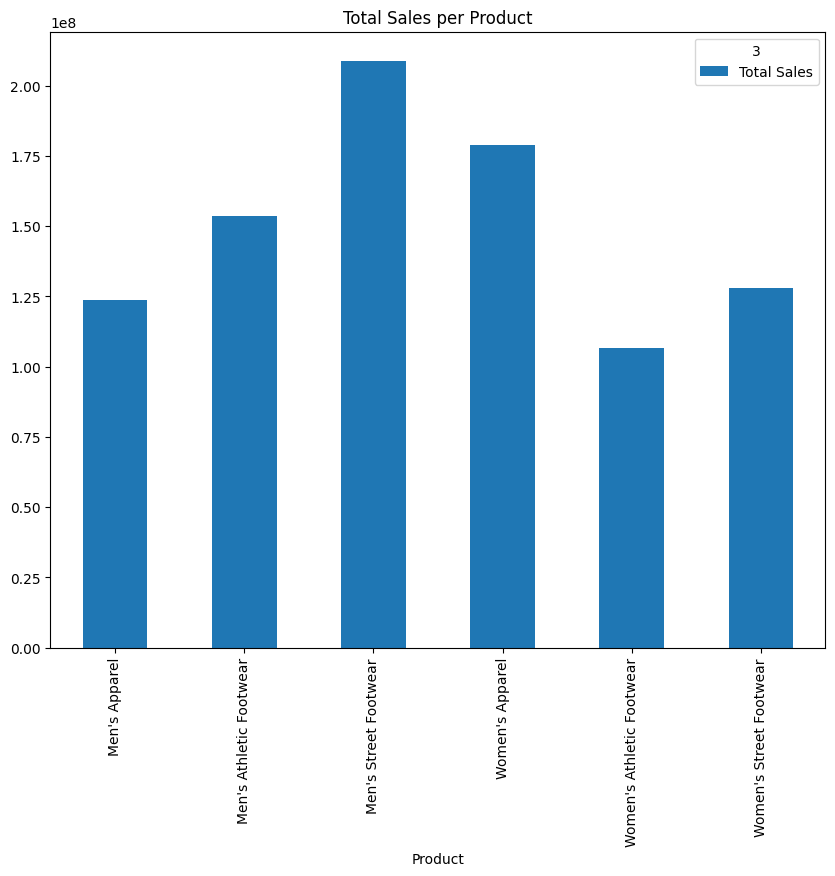

In [73]:
top_products.plot(kind='bar',figsize=(10,8),title='Total Sales per Product')
plt.show()

In [55]:
retailer_counts = df['Retailer'].value_counts()

In [56]:
retailer_counts = retailer_counts.sort_values(ascending=False)

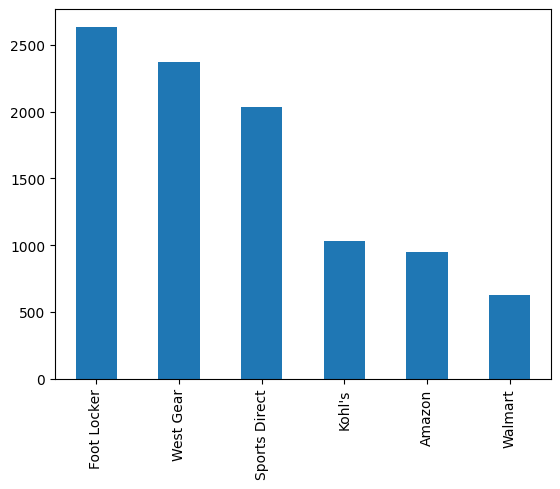

In [59]:
retailer_counts.plot(kind='bar')
plt.show()

In [29]:
top_sales= df[['Sales Method','Total Sales']].groupby('Sales Method').sum()

<Axes: title={'center': 'Top Selling Methods'}, ylabel='Sales Method'>

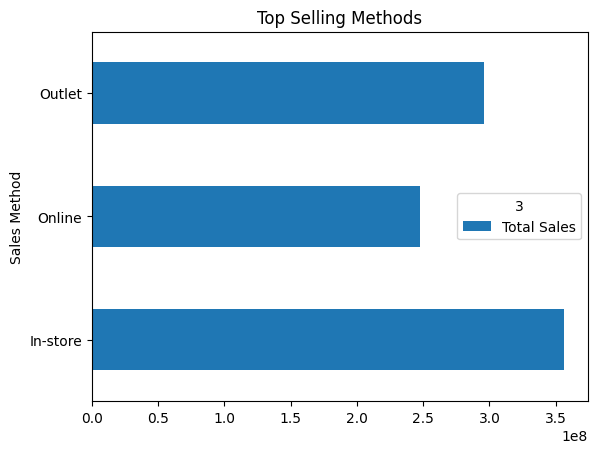

In [30]:
top_sales.plot(kind='barh',title='Top Selling Methods')

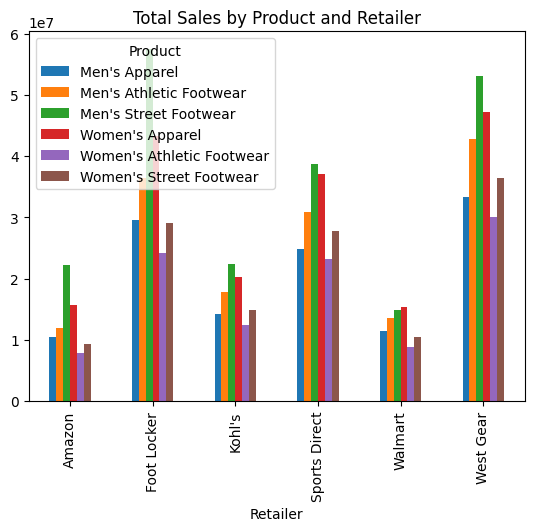

In [46]:
product_sales = df.groupby(['Retailer', 'Product'])['Total Sales'].sum()
product_sales_df = product_sales.unstack(level=1)
product_sales_df.plot(kind='bar', title='Total Sales by Product and Retailer')
plt.show()

In [36]:
retailer_sales_by_region = df.groupby(['Retailer', 'Region'])['Total Sales'].sum()

In [37]:
retailer_sales_by_region_df = retailer_sales_by_region.unstack(level=0)
retailer_sales_by_region_df

Retailer,Amazon,Foot Locker,Kohl's,Sports Direct,Walmart,West Gear
Region,,,,,,
Midwest,16835873.0,47987394.0,22229415.0,26207191.0,NaN,22540586.0
Northeast,36262590.0,65326474.0,14031168.0,24698097.0,13712005.0,32293733.0
South,409091.0,9307025.0,3552055.0,65258121.0,33049858.0,33087031.0
Southeast,10826333.0,59669118.0,NaN,54178543.0,21005539.0,17491703.0
West,13365025.0,37804709.0,62302115.0,12129045.0,6791008.0,137551280.0


In [61]:
df['year'] = pd.to_datetime(df['Invoice Date']).dt.year
df['month'] = pd.to_datetime(df['Invoice Date']).dt.month
df['day'] = pd.to_datetime(df['Invoice Date']).dt.day

In [62]:
df.groupby(['year', 'month'])['Total Sales'].sum()

year  month
2020  1        16253746.0
      2        14997988.0
      3        17660577.0
      4        24607006.0
      5        16918014.0
      6         8829819.0
      7        17146013.0
      8        19877980.0
      9        18304436.0
      10       10836269.0
      11        8622300.0
      12        8026527.0
2021  1        55225396.0
      2        46102165.0
      3        39148532.0
      4        47732964.0
      5        63589681.0
      6        65917553.0
      7        78334681.0
      8        72288221.0
      9        59357023.0
      10       53074764.0
      11       59235040.0
      12       77815430.0
Name: Total Sales, dtype: object

In [63]:
df.groupby(['Region', 'State', 'City'])['Total Sales'].sum()

Region     State           City          
Midwest    Illinois        Chicago            9797488.0
           Indiana         Indianapolis       8836198.0
           Iowa            Des Moines         7424011.0
           Kansas          Wichita            9972864.0
           Michigan        Detroit           18625433.0
           Minnesota       Minneapolis        7378068.0
           Missouri        St. Louis          9683265.0
           Montana         Billings          15710886.0
           Nebraska        Omaha              5929038.0
           North Dakota    Fargo              7735580.0
           Ohio            Columbus          18484583.0
           South Dakota    Sioux Falls        8495576.0
           Wisconsin       Milwaukee          7727469.0
Northeast  Connecticut     Hartford          11573448.0
           Delaware        Wilmington        12298412.0
           Maine           Portland           9195978.0
           Maryland        Baltimore          7758059.0
      

<ipython-input-69-72eda160b682>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




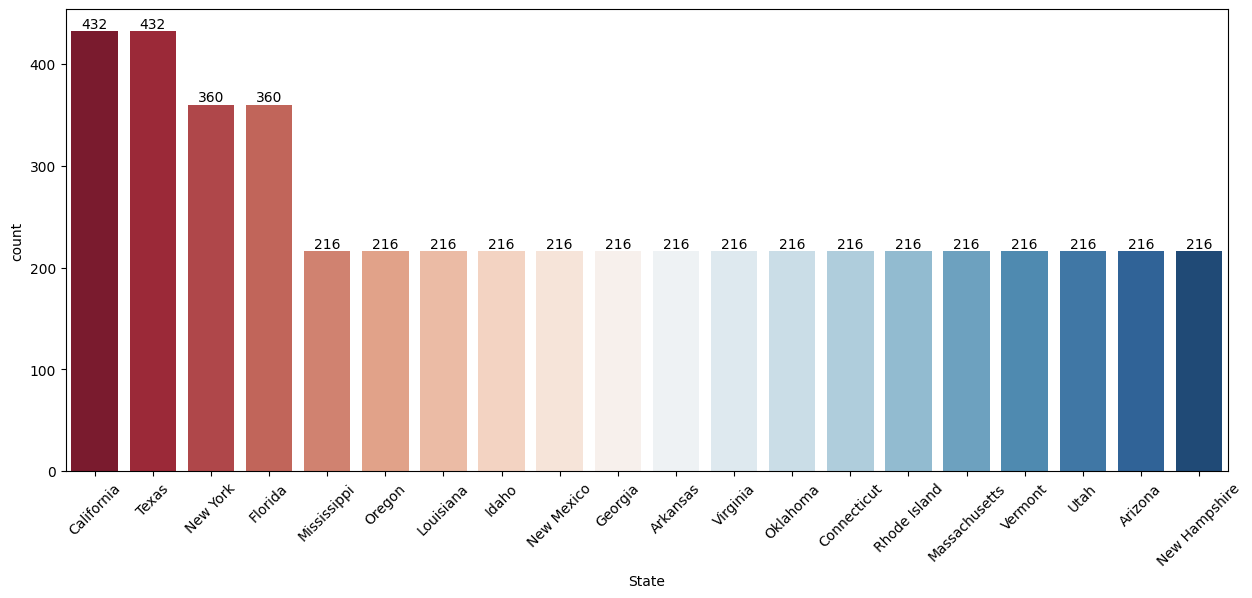

In [69]:
plt.figure(figsize = (15,6))
graph = sns.countplot(x = "State", data = df, order = df.State.value_counts()[:20].index, palette = "RdBu")
for container in graph.containers:
    graph.bar_label(container)

plt.xticks(rotation = 45)
plt.show()

# "State" sütunundaki farklı eyaletlerin sayısını gösterir.